In [ ]:
 fig = plt.figure(figsize=(25,20)) 
        _= tree.plot_tree(model, 
                   feature_names=namen,  
                   class_names=y,
                   filled=True)
        
        fig.savefig("decistion_tree.png")

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm
import graphviz
from collections import Counter
import csv
import os
import sqlite3
import re
import matplotlib.pyplot as plt


In [5]:
neue_liste = [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [16]:
# BEGINN DATENBLATT UND MODELLIERUNG

        #Lade csv
daten = pd.read_csv('corneal_dystrophies - corneal_dystrophies _data Kopie(2).csv')


daten = daten.fillna('unknown')
daten = daten.replace('y', 'yes')
daten = daten.replace('n', 'no')
        #daten.head(5)


features = list(daten.head(0))
features = features[4::]


        #Modifiziere Eingabe

for i in features:
    daten[i] = daten[i].replace('yes', i)
    daten[i] = daten[i].replace('no', f'not_{i}')
    daten[i] = daten[i].replace('unknown', f'unknown_{i}')


        # One-Hot encoding aller features

daten_encoded = pd.get_dummies(data=daten, columns=['decade of diagnosis','recurrent erosions', 'primarily affected layer','corneal thinning', 'non progressive','inheritance', 'may be unilateral', 'microcysts', 'epithelial thickening',
                                        'stroma: rings / stars', 'stroma: central snowflakes / lines', 'stroma: cloudy appearance', 'stroma: arcus', 'stroma: honeycomb', 'stroma: confluent geographic', 'stroma: pre decemetal haze', 'stromal crystals',
                                        'diffuse stromal haze ', 'deep stromal diffuse deposits', 'irregular posterior corneal surface', 'beaten metal appearance of corneal surface', 'corneal steepening', 'tiny dots on the posterior corneal surface'])
daten_encoded

daten_encoded.to_csv('daten_encoded.csv')


        # ergebnisvektor
y = daten["Name"]
target_array = y.values
target_array


namen = list(daten_encoded.head(0))

namen = namen[4::]



X = daten_encoded[namen].values
y = target_array

        #Decision Tree
        #X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

model = DecisionTreeClassifier(random_state = 1)
model.fit(X, y)

       


        #Random Forest
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

        #k nearest Neighbours

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

        #Logistic Rergression

log = LogisticRegression()
log.fit(X,y)

        #categorial bayes
clf = CategoricalNB()
clf.fit(X, y)

        #multi layer perceptron
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
mlp.fit(X,y)

        #support vector machines
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X,y)


ergebnisse = []

tree = str(model.predict([neue_liste])).strip('[]')

forest = str(clf.predict([neue_liste])).strip('[]')

neighbors = str(neigh.predict([neue_liste])).strip('[]')

regression = str(log.predict([neue_liste])).strip('[]')

bayesian = str(clf.predict([neue_liste])).strip('[]')

perception = str(mlp.predict([neue_liste])).strip('[]')

support = str(clf_svm.predict([neue_liste])).strip('[]')

ergebnisse = [tree, forest, regression, bayesian, perception, support]

ergebnisse = list(ergebnisse)

ergebnisse

["'Grayson–Wilbrandt corneal dystrophy'",
 "'Grayson–Wilbrandt corneal dystrophy'",
 "'Map-dot-fingerprint dystrophy'",
 "'Grayson–Wilbrandt corneal dystrophy'",
 "'Meesmann epithelial corneal dystrophy'",
 "'Grayson–Wilbrandt corneal dystrophy'"]

In [8]:
fig = plt.figure(figsize=(25,20)) 
_= tree.plot_tree(model, 
                   feature_names=namen,  
                   class_names=y,
                   filled=True)
        
fig.savefig("decistion_tree.png")

AttributeError: 'str' object has no attribute 'plot_tree'

<Figure size 2500x2000 with 0 Axes>

In [9]:
from sklearn import tree

In [11]:
tree.plot_tree(model, figsize=(40,20))

TypeError: plot_tree() got an unexpected keyword argument 'figsize'

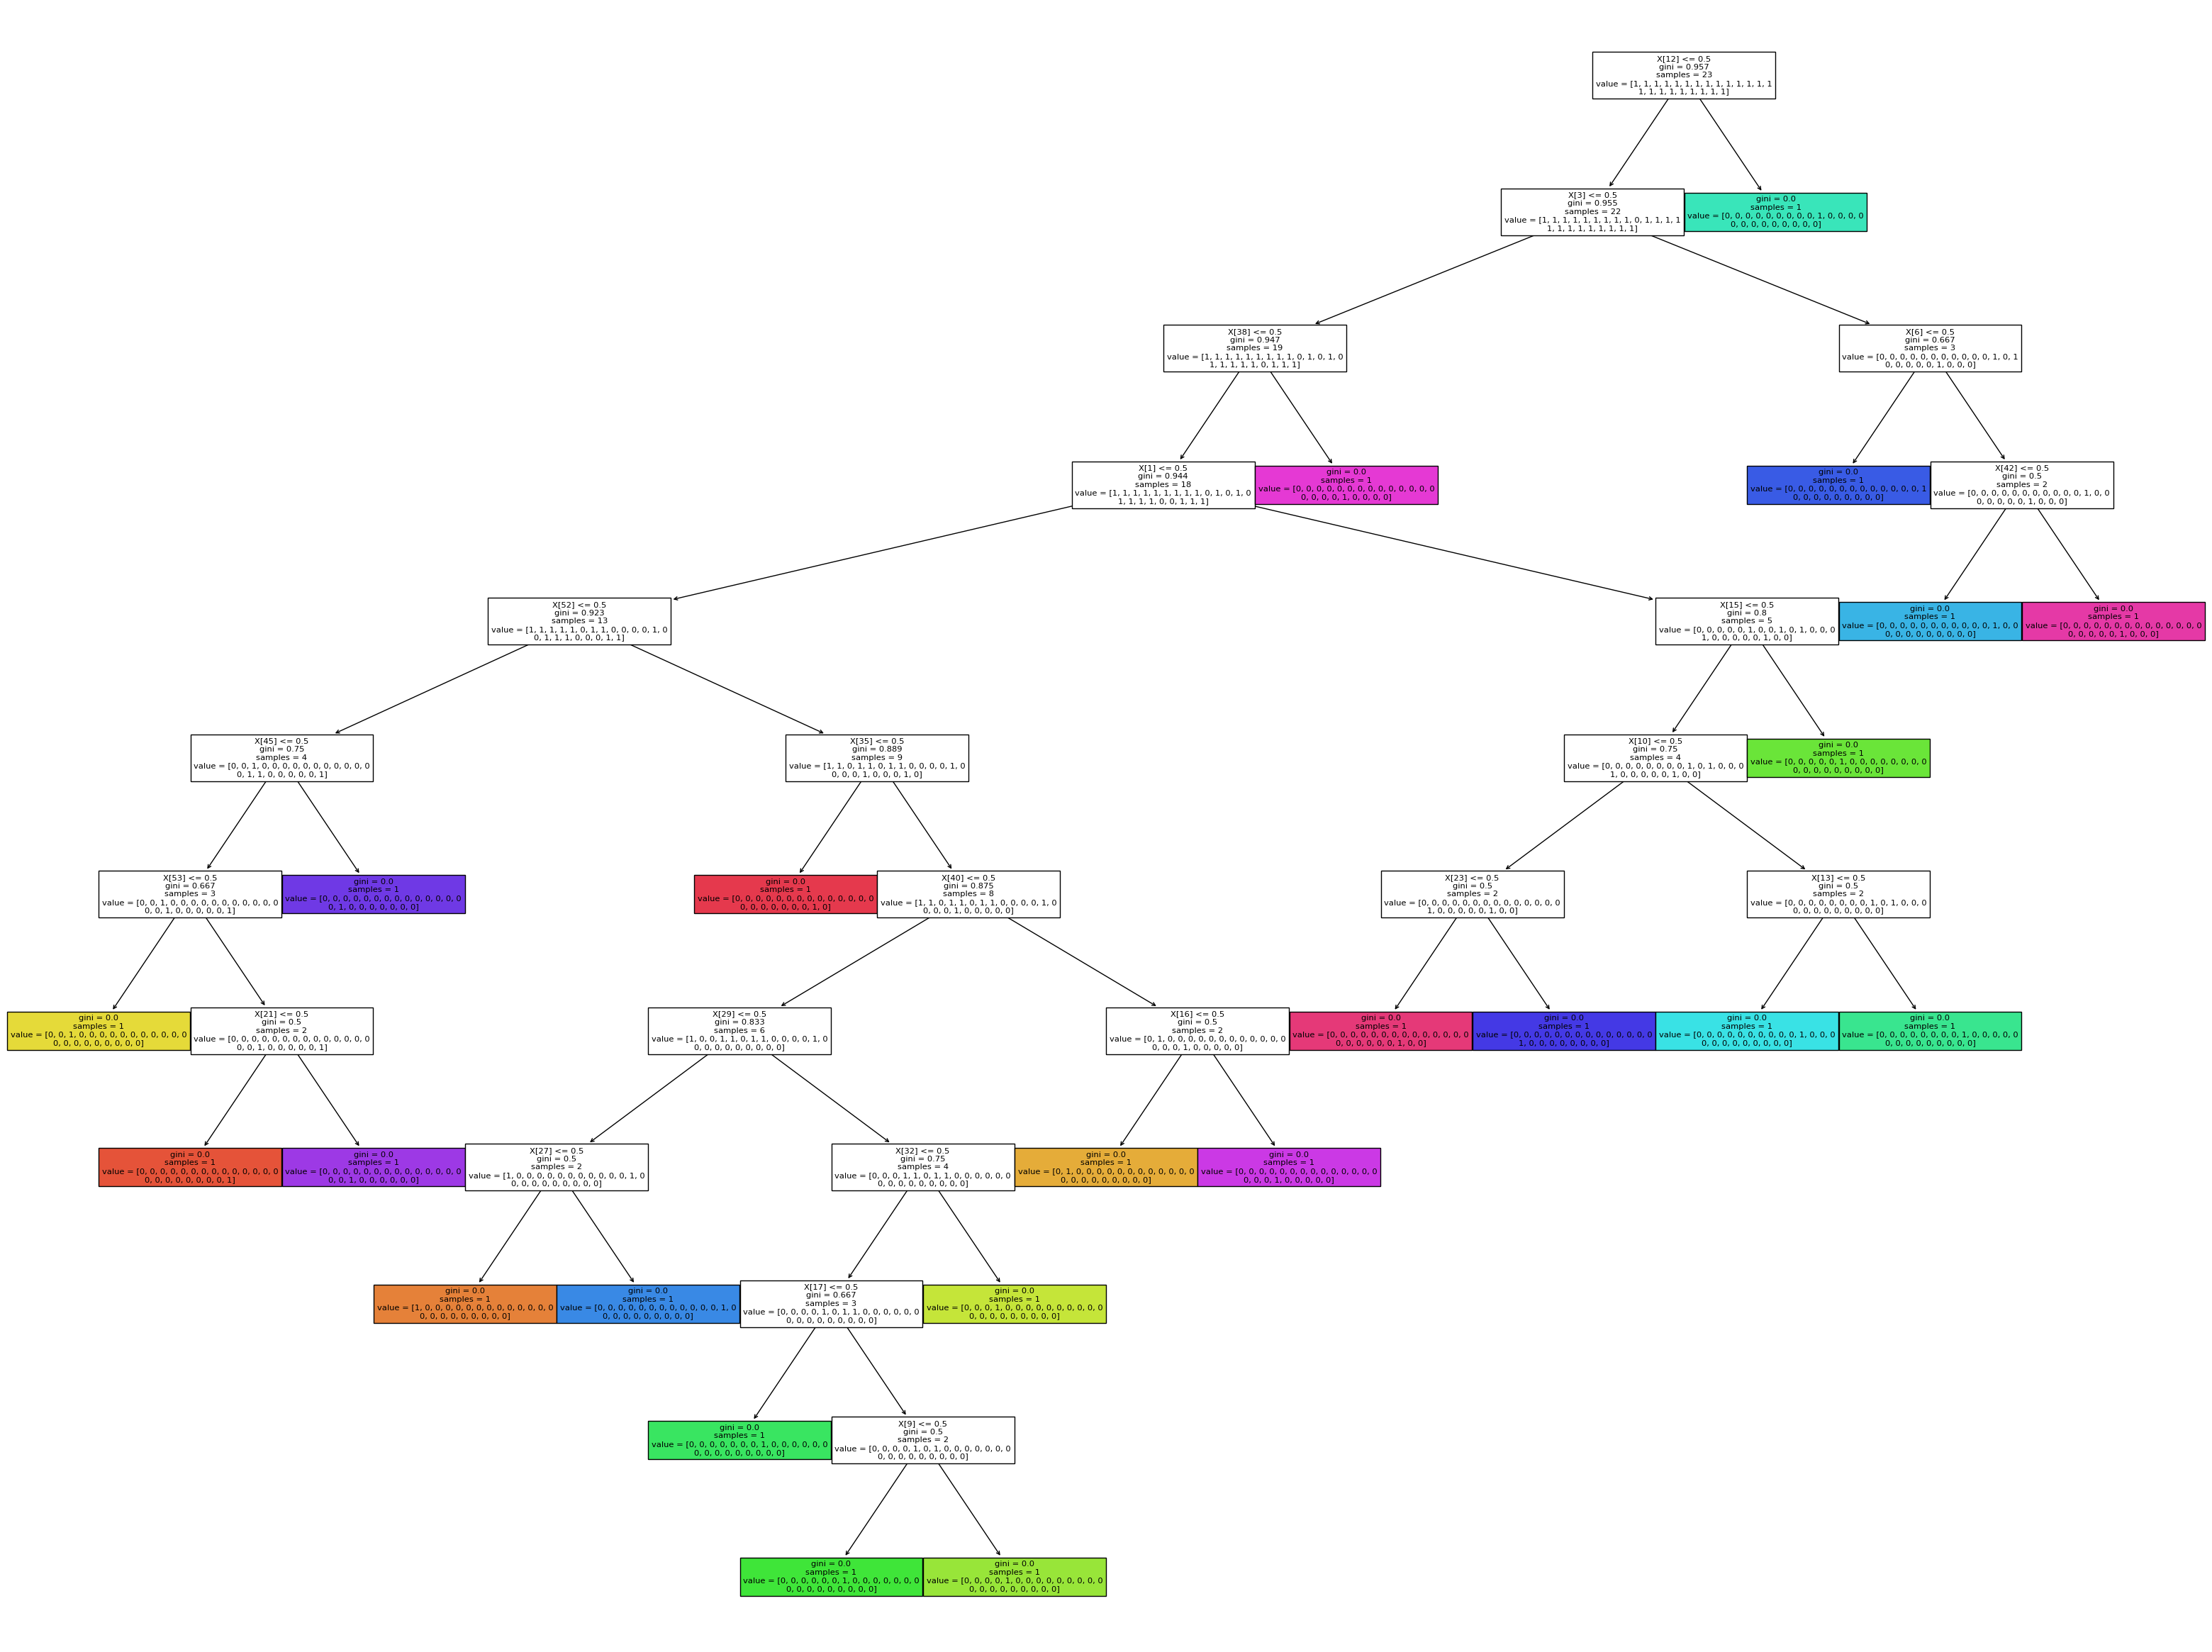

In [14]:
plt.figure(figsize=(40, 30)) # Resize figure
tree.plot_tree(model, filled=True)
plt.show()

In [17]:

        #Lade csv
daten = pd.read_csv('corneal_dystrophies - corneal_dystrophies _data Kopie(2).csv')


daten = daten.fillna('unknown')
daten = daten.replace('y', 'yes')
daten = daten.replace('n', 'no')
        #daten.head(5)


In [18]:
daten

,Name,IC3D-Code,omim,orphacode,decade of diagnosis,primarily affected layer,recurrent erosions,corneal thinning,non progressive,inheritance,...,stroma: honeycomb,stroma: confluent geographic,stroma: pre decemetal haze,stromal crystals,diffuse stromal haze,deep stromal diffuse deposits,irregular posterior corneal surface,beaten metal appearance of corneal surface,corneal steepening,tiny dots on the posterior corneal surface
0,Map-dot-fingerprint dystrophy,EBMD,121820,unknown,3.0,epi,yes,no,yes,NO,...,no,no,no,no,no,no,no,no,no,no
1,"Epithelial recurrent erosion dystrophy, France...",ERED,122400,unknown,0.0,epi,yes,no,no,AD,...,no,no,no,no,no,no,no,no,no,no
2,Posterior polymorphous corneal dystrophy,PPCD,"122000, 609140, 609141, 618031",unknown,2.0,endo,no,yes,yes,AD,...,no,no,no,no,no,no,no,no,yes,no
3,Macular corneal dystrophy,MCD,217800,unknown,2.0,"stro, endo",no,yes,no,AR,...,no,no,no,no,yes,no,no,no,no,no
4,Subepithelial mucinous corneal dystrophy,SMCD,612867,unknown,1.0,epi,no,no,no,AD,...,no,no,no,no,no,no,no,no,no,no
5,Meesmann epithelial corneal dystrophy,MECD,122100,98954.0,1.0,epi,yes,no,no,AD,...,no,no,no,no,no,no,no,no,no,no
6,Lisch epithelial corneal dystrophy,LECD,300778,98955.0,3.0,epi,no,no,no,X-linked,...,no,no,no,no,no,no,no,no,no,no
7,Gelatinous drop- like corneal dystrophy,GDCD,204870,unknown,2.0,epi,yes,no,no,AR,...,no,no,no,no,no,no,no,no,no,no
8,Lattice corneal dystrophy,LCD 1,122200,unknown,1.0,stro,yes,no,no,AD,...,no,no,no,no,no,no,no,no,no,no
9,Granular corneal dystrophy,GCD 1,121900,unknown,1.0,stro,yes,yes,no,AD,...,no,no,no,no,no,no,no,no,no,no


In [32]:
#daten[daten['primarily affected layer'] == 'stro']
daten1 = daten[daten['primarily affected layer'] == 'stro']
daten2 = daten1[daten1['recurrent erosions'] == 'yes']
daten2

,Name,IC3D-Code,omim,orphacode,decade of diagnosis,primarily affected layer,recurrent erosions,corneal thinning,non progressive,inheritance,...,stroma: honeycomb,stroma: confluent geographic,stroma: pre decemetal haze,stromal crystals,diffuse stromal haze,deep stromal diffuse deposits,irregular posterior corneal surface,beaten metal appearance of corneal surface,corneal steepening,tiny dots on the posterior corneal surface
8,Lattice corneal dystrophy,LCD 1,122200,unknown,1.0,stro,yes,no,no,AD,...,no,no,no,no,no,no,no,no,no,no
9,Granular corneal dystrophy,GCD 1,121900,unknown,1.0,stro,yes,yes,no,AD,...,no,no,no,no,no,no,no,no,no,no
10,Avellino,GCD 2,607541,unknown,2.0,stro,yes,yes,no,AD,...,no,no,no,no,no,no,no,no,no,no
11,Reis–Bücklers corneal dystrophy,RBCD,608470,unknown,1.0,stro,yes,yes,no,AD,...,no,yes,no,no,no,no,no,no,no,no
12,Thiel–Behnke corneal dystrophy,TBCD,602082,unknown,2.0,stro,yes,yes,no,AD,...,yes,no,no,no,no,no,no,no,no,no
